# Data Analysis on Crimes of Rape in India 
By Darshik A S

In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context('notebook')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [414]:
# load Dataset
data = pd.read_csv('victims_of_rape.csv')

In [415]:
data.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [417]:
# Shortening column names
data.columns = ['Area','Year','Group','Cases','Above 50','10-14','14-18','18-30','30-50','Total','Upto 10']

In [418]:
# Change type of Year column to object type
data.Year = data.Year.astype('object')

In [419]:
# Number of distict observations in the object attributes
for i in ['Area','Year','Group']:
    print(i,data[i].nunique())

Area 35
Year 10
Group 3


In [420]:
# Verifying distribution in object attributes
for i in ['Area','Year','Group']:
    print(data[i].value_counts())
    print('\n')

Jharkhand                    30
Meghalaya                    30
Karnataka                    30
Rajasthan                    30
Tamil Nadu                   30
Andaman & Nicobar Islands    30
Punjab                       30
Puducherry                   30
Uttarakhand                  30
Madhya Pradesh               30
Chhattisgarh                 30
Haryana                      30
Mizoram                      30
Daman & Diu                  30
Goa                          30
Kerala                       30
Arunachal Pradesh            30
Andhra Pradesh               30
Uttar Pradesh                30
Chandigarh                   30
Himachal Pradesh             30
Manipur                      30
Gujarat                      30
Dadra & Nagar Haveli         30
Sikkim                       30
Nagaland                     30
Delhi                        30
Odisha                       30
Jammu & Kashmir              30
Tripura                      30
Assam                        30
Maharash

In [421]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cases,1050.0,361.920000,592.180572,0.0,4.0,37.0,527.50,3135.0
Above 50,1050.0,1.866667,4.640286,0.0,0.0,0.0,1.00,43.0
10-14,1050.0,23.657143,50.677418,0.0,0.0,3.0,19.00,416.0
14-18,1050.0,53.085714,115.127899,0.0,0.0,5.0,42.00,826.0
18-30,1050.0,212.937143,350.135760,0.0,1.0,15.5,308.00,1835.0
30-50,1050.0,60.236190,118.322713,0.0,0.0,4.0,58.75,811.0
Total,1050.0,362.198095,592.418089,0.0,4.0,37.0,531.50,3136.0
Upto 10,1050.0,10.415238,19.533134,0.0,0.0,2.0,11.00,131.0


In [422]:
# Sort values according to year and area
data.sort_values(['Year','Area'],inplace=True)

In [423]:
# Seaprating Total Rape Victims group from the dataset
data_total_victims = data[data['Group'] == 'Total Rape Victims']

In [425]:
data_total_victims.drop(columns=['Group'],inplace=True)

In [426]:
data_total_victims.head()

,Area,Year,Cases,Above 50,10-14,14-18,18-30,30-50,Total,Upto 10
0,Andaman & Nicobar Islands,2001,3,0,0,3,0,0,3,0
30,Andhra Pradesh,2001,871,14,138,254,328,80,871,57
60,Arunachal Pradesh,2001,33,0,0,1,28,4,33,0
90,Assam,2001,817,2,73,245,370,119,817,8
120,Bihar,2001,888,0,15,198,562,112,888,1


In [432]:
# Grouping years by summing the values along the columns
data_sum = data_total_victims.groupby(['Year'],as_index=False).sum()

In [437]:
# Add a new coulmn for the difference in Total rape victim counts and number of cases reported 
data_sum['Diff'] = data_sum['Total'] - data_sum['Cases']

In [443]:
# Add a new column for the ratio of difference Total rape victim counts and number of cases reported over Total victim counts
data_sum['Diff_ratio'] = data_sum['Diff'] / data_sum['Total']

In [444]:
data_sum.head()

,Year,Cases,Above 50,10-14,14-18,18-30,30-50,Total,Upto 10,Diff,Diff_ratio
0,2001,16075,68,1440,3911,7881,2248,16078,530,3,0.000187
1,2002,16373,66,854,1325,10730,2992,16378,411,5,0.000305
2,2003,15847,60,931,1792,9873,2811,15856,389,9,0.000568
3,2004,18233,81,1090,2004,11343,3189,18239,532,6,0.000329
4,2005,18359,111,1174,2344,10809,3381,18376,557,17,0.000925


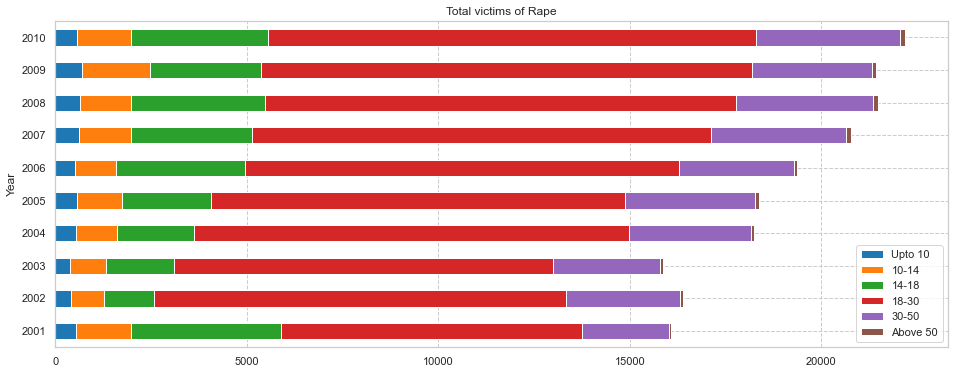

In [445]:
# Ploting stacked graph of the total victims of rape over the years as the sum of victims in different age category
data_sum[['Year','Upto 10','10-14','14-18','18-30','30-50','Above 50'
                        ]].set_index('Year').plot(kind='barh', stacked=True,figsize=(16,6))
plt.title('Total victims of Rape')
plt.show()

* From the above graph its clear that the number in crimes of rapes is only increasing through the years
* Most of the victims are in the age group of 18-30 years

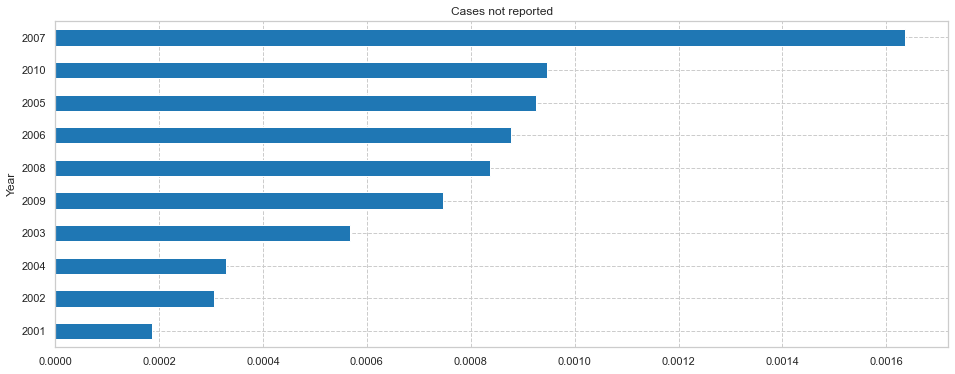

In [442]:
# Plotting the ration of difference in cases reported over the total cases
ax = data_sum[['Year','Diff_ratio']].sort_values('Diff_ratio').set_index('Year').plot(kind='barh',figsize=(16,6))
plt.title('Cases not reported')
ax.get_legend().remove()
plt.show()

2007 has the highest number of non reported cases

In [446]:
# Grouping area by summing the values along the columns
data_total_victims_sum = data_total_victims.groupby('Area',as_index=False).sum().sort_values('Total')

In [447]:
# Adding a column fo the difference in cases and total victims
data_total_victims_sum['Diff'] = data_total_victims_sum['Total'] - data_total_victims_sum['Cases']

In [448]:
data_total_victims_sum.head()

,Area,Cases,Above 50,10-14,14-18,18-30,30-50,Total,Upto 10,Diff
18,Lakshadweep,7,0,0,0,5,2,7,0,0
8,Daman & Diu,14,0,1,4,3,1,14,5,0
7,Dadra & Nagar Haveli,49,0,8,13,22,1,49,5,0
26,Puducherry,57,0,4,25,17,2,57,9,0
0,Andaman & Nicobar Islands,84,0,8,44,21,4,84,7,0


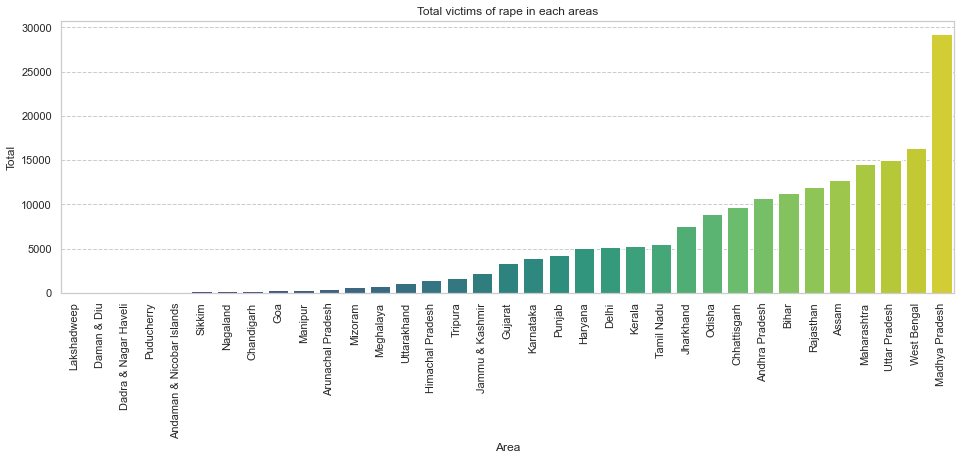

In [450]:
# Plot the total victim counts in each areas
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data_total_victims_sum,x='Area',y='Total',palette='viridis',)
ax.set_xticklabels(labels=data_total_victims_sum.Area.unique(),rotation=90)
plt.title('Total victims of rape in each areas')
plt.show()

* Madhyapradesh has the highest number of victims of rape in the country
* Other few areas with higher victims counts in the country are West Bengal, Uttar Pradesh, Maharashtra, Assam, etc

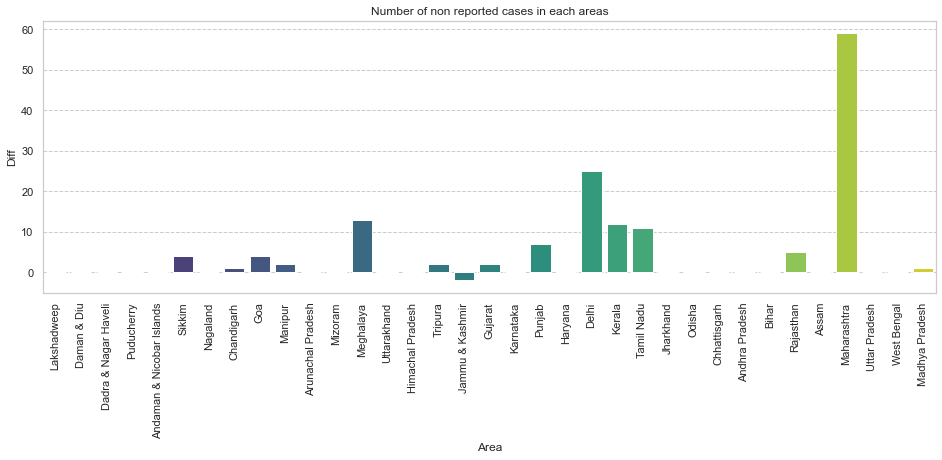

In [451]:
# Plot the number of non reported cases in the country
plt.figure(figsize=(16,5))
ax = sns.barplot(data=data_total_victims_sum,x='Area',y='Diff',palette='viridis',)
plt.axhline
ax.set_xticklabels(labels=data_total_victims_sum.Area.unique(),rotation=90)
plt.title('Number of non reported cases in each areas')
plt.show()

Maharashtra, Delhi and Meghalaya has the highest number non reported counts

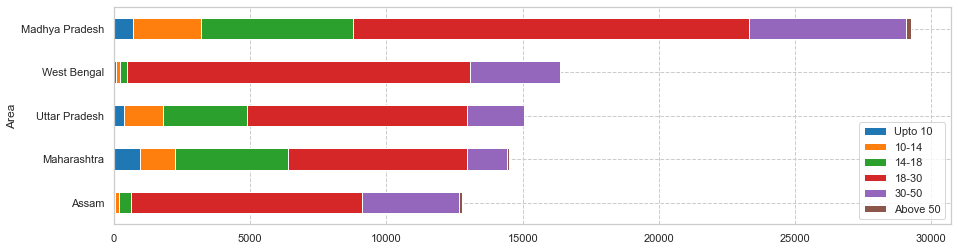

In [452]:
"""Ploting stacked graph of the top 5 areas with total victims of rape 
over the years as the sum of victims in different age category"""

data_total_victims_sum[['Area','Upto 10','10-14','14-18','18-30','30-50','Above 50'
                        ]].tail().set_index('Area').plot(kind='barh', stacked=True,figsize=(15,4))
plt.show()

Among the these areas, West bengal has least the victims of rapes falling under the minor age groups and above 50 years of age

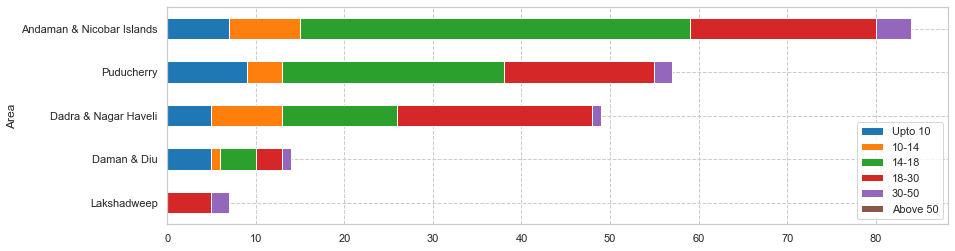

In [364]:
data_total_victims_sum[['Area','Upto 10','10-14','14-18','18-30','30-50','Above 50'
                        ]].head().set_index('Area').plot(kind='barh', stacked=True,figsize=(14,4))
plt.show()

These five areas has the least number of total vicitms in the country. It can be considered as the safest among all the other areas, it makes sense that these areas are the uninon terrotories with much less population.

In [456]:
# Further analysis on the top 5 areas with the highest victims of rapes
top_area = ['Madhya Pradesh','West Bengal','Uttar Pradesh','Maharashtra','Assam']

In [457]:
data_total_victims_top_5 = data_total_victims[data_total_victims['Area'].isin(top_area)][['Area','Year','Total']]

In [458]:
data_total_victims_top_5.head()

,Area,Year,Total
90,Assam,2001,817
570,Madhya Pradesh,2001,2851
600,Maharashtra,2001,1302
960,Uttar Pradesh,2001,1958
1020,West Bengal,2001,709


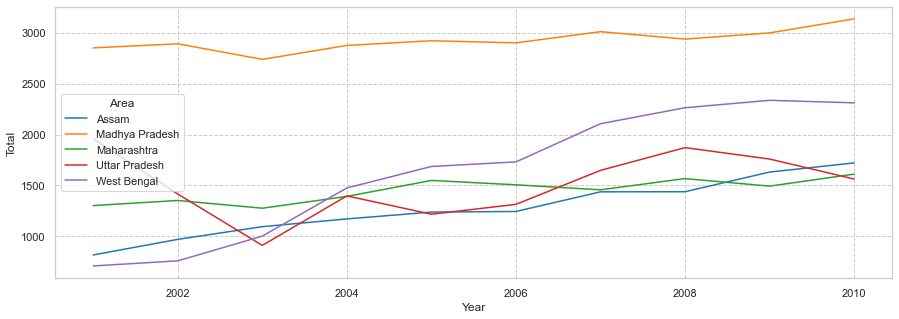

In [459]:
# Plotting line graph of victim counts on each year
plt.figure(figsize=(15,5))
sns.lineplot(data=data_total_victims_top_5,x='Year',y='Total',hue='Area')
plt.show()

* Rape crimes in West Bengal has been incresing at a higher rate through the years
* Crimes in Madhya pradesh are very higher than the other areas on every year

In [460]:
# Visualizing proportionn of crimes in different age groups
mp = dict(data_total_victims[data_total_victims['Area'] == 'Madhya Pradesh'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))
wb = dict(data_total_victims[data_total_victims['Area'] == 'West Bengal'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))
up = dict(data_total_victims[data_total_victims['Area'] == 'Uttar Pradesh'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))
mh = dict(data_total_victims[data_total_victims['Area'] == 'Maharashtra'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))
am = dict(data_total_victims[data_total_victims['Area'] == 'Assam'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))

In [461]:
fig = make_subplots(rows=1, cols=5, 
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Madhya Pradesh','West Bengal','Uttar Pradesh','Maharashtra','Assam']
                   )

fig.add_trace(
    go.Pie(labels=list(mp.keys()), values=list(mp.values()), hole=.3),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(wb.keys()), values=list(wb.values()), hole=.3),
    row=1, col=2
)

fig.add_trace(
    go.Pie(labels=list(up.keys()), values=list(up.values()), hole=.3),
    row=1, col=3
)

fig.add_trace(
    go.Pie(labels=list(mh.keys()), values=list(mh.values()), hole=.3),
    row=1, col=4
)

fig.add_trace(
    go.Pie(labels=list(am.keys()), values=list(am.values()), hole=.3),
    row=1, col=5
)

fig.update_traces(marker=dict(line=dict(color='white', width=1)))
fig.show()

In [374]:
data_victims = data[data['Group'] != 'Total Rape Victims']

In [375]:
data_victims.head()

,Area,Year,Group,Cases,Above 50,10-14,14-18,18-30,30-50,Total,Upto 10
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
31,Andhra Pradesh,2001,Victims of Incest Rape,4,0,2,0,2,0,4,0
32,Andhra Pradesh,2001,Victims of Other Rape,867,14,136,254,326,80,867,57
61,Arunachal Pradesh,2001,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [464]:
data_sum = data_victims.groupby('Group',as_index=False).sum()

In [465]:
data_sum

,Group,Cases,Above 50,10-14,14-18,18-30,30-50,Total,Upto 10
0,Victims of Incest Rape,4216,26,513,1042,1882,517,4219,239
1,Victims of Other Rape,185792,954,11907,26828,109910,31107,185935,5229


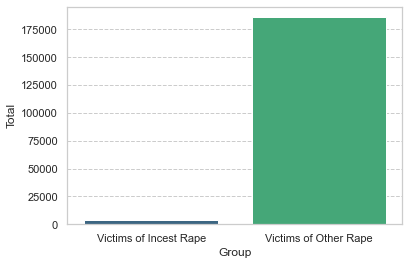

In [466]:
# countplot for incest and other rape counts
sns.barplot(data=data_sum,x='Group',y='Total',palette='viridis',)
plt.show()

Victims of other rapes are very hgher than the victims of incest rape

In [467]:
# Visualizing the proportion of victims of incest and other rapes in different age category
insr = dict(data_sum[data_sum['Group'] == 'Victims of Incest Rape'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))

othr = dict(data_sum[data_sum['Group'] == 'Victims of Other Rape'][[
    'Upto 10','10-14','14-18','18-30','30-50','Above 50']].sum(axis=0))

In [468]:
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Victims of Incest Rape','Victims of Other Rape']
                   )

fig.add_trace(
    go.Pie(labels=list(insr.keys()), values=list(insr.values()), hole=.3),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=list(othr.keys()), values=list(othr.values()), hole=.3),
    row=1, col=2
)

fig.update_traces(marker=dict(line=dict(color='white', width=1)))
fig.show()

In [469]:
# Multivariate analysis of total victims of rapes (Area and Year) 
data_area_year = data_total_victims[['Area','Year','Total']]

In [470]:
data_area_year.head()

,Area,Year,Total
0,Andaman & Nicobar Islands,2001,3
30,Andhra Pradesh,2001,871
60,Arunachal Pradesh,2001,33
90,Assam,2001,817
120,Bihar,2001,888


In [471]:
area = list(data_area_year.Area.unique())
year = list(data_area_year.Year.unique())

In [472]:
array = []
for i in area:
    array.append(list(data_area_year[data_area_year['Area']==i]['Total']))

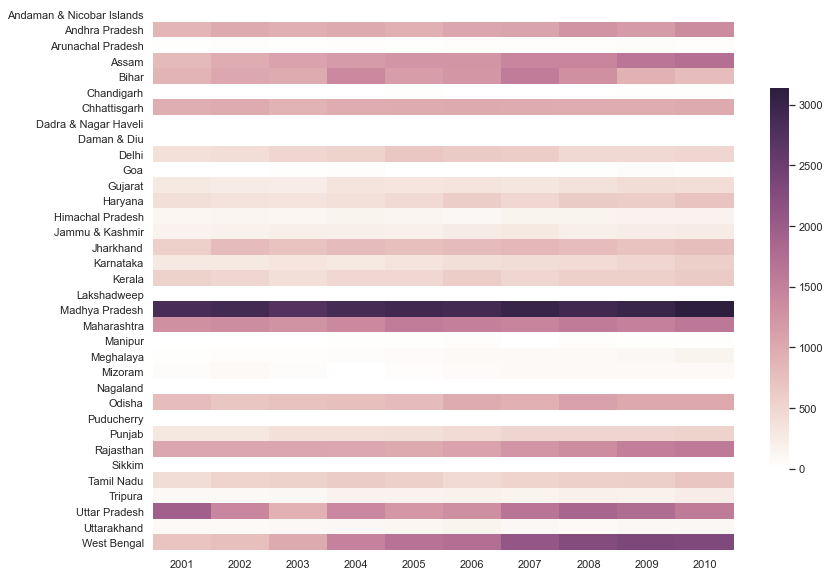

In [474]:
# PLot heatmap for Area vs Years
plt.figure(figsize=(13,10))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.heatmap(np.array(array),annot=False, cmap=cmap, cbar_kws={"shrink": .7})
ax.set_xticklabels(year)
ax.set_yticklabels(area, rotation=0)
plt.show()